In [115]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas
import statistics as stat

## Experiment measurements (water level at the static pressure gauges)

In [377]:
# hN1 = np.array([[height at node 1 at reading 1 for exp1, ..., 
#                    height at node 1 at reading 6 for exp1],
#
#                   [height at node 1 at reading 1 for exp2, ..., 
#                    height at node 1 at reading 6 for exp2],
#
#                   [height at node 1 at reading 1 for exp3, ..., 
#                    height at node 1 at reading 6 for exp3]])

# Node 1                    
hN1 = np.array([[265, 255, 250, 240, 230, 235],
               [215, 205, 200, 200, 185, 190],
              [128, 125, 123, 120, 120, 115]])


# Node 2
hN2 = np.array([[250, 240, 235, 225, 215, 220], 
               [210, 205, 198, 193, 175, 185], 
               [125, 122, 120, 115, 118, 114]])

# Node 3
hN3 = np.array([[15, 12, 12, 23, 12, 20], 
               [123, 114, 115, 114, 100, 105], 
               [100, 96, 96, 96, 97, 97]])

# Node 4
hN4 = np.array([[160, 152, 148, 148, 138, 145], 
               [173, 163, 158, 160, 145, 152], 
               [112, 108, 107, 107, 108, 104]])

# Node 5
hN5 = np.array([[182, 178, 176, 172, 162, 170], 
               [182, 173, 167, 168, 153, 162], 
               [115, 112, 118, 108, 108, 105]])

# Node 6
hN6 = np.array([[192, 187, 186, 182, 172, 180], 
              [185, 176, 171, 172, 156, 166], 
               [116, 112, 111, 111, 111, 106]])

# Note: All the height above are measured in [mm]

## Experiment measurements (water level at the total head gauge)

In [378]:
# tothead1 = np.array([total head at node 1 for exp1], 
#                     [total head at node 1 for exp2],
#                     [total head at node 1 for exp3])

tothead1 = np.array([[28.2],
                    [22.8],
                    [14]])

tothead2 = np.array([[27.2],
                   [21.6],
                   [13]])

tothead3 = np.array([[26],
                   [21.3],
                   [12.4]])

tothead4 = np.array([[23.5], 
                   [19.4], 
                   [11.8]])

tothead5 = np.array([[22.5],
                   [17.8],
                   [11.4]])

tothead6 = np.array([[21.5],
                   [18.0],
                   [11.4]])

# Note: All the height above are measured in [mm]

## Experiment measurements (Time required to fill 10 litres of water)

In [379]:
# time = np.array([[time required to fill 10 litres of water for exp1], 
#                  [time required to fill 10 litres of water for exp2], 
#                  [time required to fill 10 litres of water for exp3]])

time = np.array([[57.3],
               [108],
               [190]])

# Note: Time is measured in seconds [s]

## Experimental data error analysis 
### (Optional, I only calculate the mean, I still have not perform the error analysis yet). 

[1]: “Evaluation of measurement data -Guide to the expression of uncertainty in measurement Évaluation des données de mesure - Guide pour l’expression de l’incertitude de mesure.”. pp: 8-11. Available: https://www.bipm.org/documents/20126/2071204/JCGM_100_2008_E.pdf/cb0ef43f-baa5-11cf-3f85-4dcd86f77bd6 .

### 4.2 Type A evaluation of standard uncertainty

#### Arithmetic mean (4.2.1)
The expected value $\mu_X$ of a quantity X which is a random variable, given n independent observations under the same conditions of measurements, is the arithmetic mean $\overline{X}$: $\newline$
$\overline{X} = \dfrac{1}{n} \sum_{i=1}^n X_i$

In [380]:
def cal_mean(lst):
    """Returns the mean of the measured values of quantity X"""
    res = 0;
    n = len(lst);
    
    for i in lst:
        res += i;
    
    return res / n;  

#### Eperimental Standard Deviation (4.2.2)
To show the variability of the measured values of the quantity X, we use the experimental standard deviation:

$s(x_i) = \sqrt{\dfrac{\sum_{i=1}^n (X_i - \overline{X})^2}{n - 1}}$

In [381]:
def cal_ssd(lst):
    """Returns the sample standard deviation of the measured values of quantity X. """
    
    x_bar = cal_mean(lst)
    x_diff = [(i - x_bar)**2 for i in lst];
    n = len(lst);
    
    tmp = sum(x_diff);
    
    return math.sqrt(tmp / (n - 1));  

#### Experiemental Standard deviation of the mean (4.2.3)
The measurement of the variability of the means (if a experiment consisting of measurements repeated many times, then the distribution of menas has its own standard deviation) is represented by the standard deviation of the means (often called the standard error of the mean) as $s(\overline{X})$

To show the variability of the measured values of the quantity X against the expectation $\mu_x$, we use the experimental standard deviation

$s(\overline{x}) = \dfrac{s(x_i)}{\sqrt{n}}$

In [382]:
def cal_sderr(lst):
    """Returns the sample standard deviation of the mean"""
    
    ssd = cal_ssd(lst)
    
    return (ssd / math.sqrt(n));

## Find the mean for the water level [mm] at each node in the static pressure gauge for each experiment 
### Data are obtained from the photoshots included in the other folders in the same Github repository.

In [448]:
# Experiment 1

height_n1_exp1 = cal_mean(hN1[0])
height_n2_exp1 = cal_mean(hN2[0])
height_n3_exp1 = cal_mean(hN3[0])
height_n4_exp1 = cal_mean(hN4[0])
height_n5_exp1 = cal_mean(hN5[0])
height_n6_exp1 = cal_mean(hN6[0])

exp1WaterLevel = np.array([height_n1_exp1, 
                           height_n2_exp1, 
                           height_n3_exp1, 
                           height_n4_exp1, 
                           height_n5_exp1, 
                           height_n6_exp1])

print("For experiment 1: ")
for i in range(6):
    print(f"The water level at node {i+1} is {exp1WaterLevel[i]} [mm]")

For experiment 1: 
The water level at node 1 is 245.83333333333334 [mm]
The water level at node 2 is 230.83333333333334 [mm]
The water level at node 3 is 15.666666666666666 [mm]
The water level at node 4 is 148.5 [mm]
The water level at node 5 is 173.33333333333334 [mm]
The water level at node 6 is 183.16666666666666 [mm]


In [449]:
# Experiment 2

height_n1_exp2 = cal_mean(hN1[1])
height_n2_exp2 = cal_mean(hN2[1])
height_n3_exp2 = cal_mean(hN3[1])
height_n4_exp2 = cal_mean(hN4[1])
height_n5_exp2 = cal_mean(hN5[1])
height_n6_exp2 = cal_mean(hN6[1])

exp2WaterLevel = np.array([height_n1_exp2, 
                           height_n2_exp2, 
                           height_n3_exp2, 
                           height_n4_exp2, 
                           height_n5_exp2, 
                           height_n6_exp2])

print("For experiment 2: ")
for i in range(6):
    print(f"The water level at node {i+1} is {exp2WaterLevel[i]} [mm]")

For experiment 2: 
The water level at node 1 is 199.16666666666666 [mm]
The water level at node 2 is 194.33333333333334 [mm]
The water level at node 3 is 111.83333333333333 [mm]
The water level at node 4 is 158.5 [mm]
The water level at node 5 is 167.5 [mm]
The water level at node 6 is 171.0 [mm]


In [450]:
# Experiment 3

height_n1_exp3 = cal_mean(hN1[2])
height_n2_exp3 = cal_mean(hN2[2])
height_n3_exp3 = cal_mean(hN3[2])
height_n4_exp3 = cal_mean(hN4[2])
height_n5_exp3 = cal_mean(hN5[2])
height_n6_exp3 = cal_mean(hN6[2])

exp3WaterLevel = np.array([height_n1_exp3, 
                           height_n2_exp3, 
                           height_n3_exp3, 
                           height_n4_exp3, 
                           height_n5_exp3, 
                           height_n6_exp3])

print("For experiment 3: ")
for i in range(6):
    print(f"The water level at node {i+1} is {exp3WaterLevel[i]} [mm]")

For experiment 3: 
The water level at node 1 is 121.83333333333333 [mm]
The water level at node 2 is 119.0 [mm]
The water level at node 3 is 97.0 [mm]
The water level at node 4 is 107.66666666666667 [mm]
The water level at node 5 is 111.0 [mm]
The water level at node 6 is 111.16666666666667 [mm]


## The total head [m^2 / s^2] at each node for each experiment
$\dfrac{u^2}{2} + g z + \dfrac{P}{\rho} = constant$, where the constant is the total head.

In [452]:
for j in range(3):
    print(f"The total head at node 1 for experiment {j+1} {tothead1[j][0]} [m^2 / s^2]")

print("\n")
for j in range(3):
    print(f"The total head at node 2 for experiment {j+1} {tothead2[j][0]} [m^2 / s^2]")
    
print("\n")
for j in range(3):
    print(f"The total head at node 3 for experiment {j+1} {tothead3[j][0]} [m^2 / s^2]")
print("\n")
for j in range(3):
    print(f"The total head at node 4 for experiment {j+1} {tothead4[j][0]} [m^2 / s^2]")

print("\n")
for j in range(3):
    print(f"The total head at node 5 for experiment {j+1} {tothead5[j][0]} [m^2 / s^2]")
    

print("\n")
for j in range(3):
    print(f"The total head at node 6 for experiment {j+1} {tothead6[j][0]} [m^2 / s^2]")

The total head at node 1 for experiment 1 28.2 [m^2 / s^2]
The total head at node 1 for experiment 2 22.8 [m^2 / s^2]
The total head at node 1 for experiment 3 14.0 [m^2 / s^2]


The total head at node 2 for experiment 1 27.2 [m^2 / s^2]
The total head at node 2 for experiment 2 21.6 [m^2 / s^2]
The total head at node 2 for experiment 3 13.0 [m^2 / s^2]


The total head at node 3 for experiment 1 26.0 [m^2 / s^2]
The total head at node 3 for experiment 2 21.3 [m^2 / s^2]
The total head at node 3 for experiment 3 12.4 [m^2 / s^2]


The total head at node 4 for experiment 1 23.5 [m^2 / s^2]
The total head at node 4 for experiment 2 19.4 [m^2 / s^2]
The total head at node 4 for experiment 3 11.8 [m^2 / s^2]


The total head at node 5 for experiment 1 22.5 [m^2 / s^2]
The total head at node 5 for experiment 2 17.8 [m^2 / s^2]
The total head at node 5 for experiment 3 11.4 [m^2 / s^2]


The total head at node 6 for experiment 1 21.5 [m^2 / s^2]
The total head at node 6 for experiment 2 18.0

## Result calculations from experimental data

Assume incompressible flow and no frictional losses, from Bernoulli's Equation
$$
\frac{P_{1}}{\rho g}+\frac{V_{1}^{2}}{2 g}+Z_{1}=\frac{P_{2}}{\rho g}+\frac{V_{2}^{2}}{2 g}+Z_{2}
$$
where Z is the elevation above some arbitary horizontal plane. 

Use of the continuity Equation $\mathrm{Q}=\mathrm{A}_{1} \mathrm{~V}_{1}=\mathrm{A}_{2} \mathrm{~V}_{2}$, equation (1) becomes 

$$
\begin{aligned}
& \frac{P_{1}-P_{2}}{\rho g}+ (Z_{1}-Z_{2}) =\frac{V_{2}^{2}}{2 g}\left[1-\left(\frac{A_{2}}{A_{1}}\right)^{2}\right] \\
& V_{2}=\frac{1}{\sqrt{1-\left(\frac{A_{2}}{A_{1}}\right)^{2}}} \sqrt{2 g\left(\frac{P-P_{2}}{\rho g}+\left(Z_{1}-Z_{2}\right)\right)}
\end{aligned}
$$
The theoretical flow rate is therefore:
$$
Q_{\text {theo }}=A_{2} V_{2}=\frac{A_{2}}{\sqrt{1-\left(\frac{A_{2}}{A_{1}}\right)^{2}}} \sqrt{2 g\left(\frac{P_{1}-P_{2}}{\rho g}+\left(Z_{1}-Z_{2}\right)\right)}
$$

Since the term $\frac{P_{1}-P_{2}}{\rho g}+\left(Z_{1}-Z_{2}\right)$ represents the difference in piezometric  head $(\Delta h)$ between two nodes, in this case nodes 1 and 2. The above expression for $V_{2}$ is obtained based on the assumption of one-dimensipnal frictionless flow. Hence the theoritical flow can be expressed as

$$
Q_{\text {theo }}=A_{2} V_{2}=\frac{A_{2}}{\sqrt{1-\left(\frac{A_{2}}{A_{1}}\right)^{2}}} \sqrt{2 g(\Delta h)}
$$

Thus, 
$$
Q_{\text {theo }}= \sqrt{\dfrac{2 g \Delta h}{\left(\frac{1}{A_{2}^{2}}-\frac{1}{A_{1}^{2}}\right)}} \hspace{1cm} Eq(1)
$$

Because of the above assumptions, the actual flow rate, $Q_{\text {act }}$ differs from $Q_{\text {theo }}$ and the ratio between them is called the discharge coefficient, $\mathrm{C}_{\mathrm{d}}$ which can be written as $$
C_{d}=\frac{Q_{\text {act }}}{Q_{\text {theo }}} \hspace{1cm} Eq(2)
$$


[1]:“Ankara Yıldırım Beyazıt Üniversitesi,” www.aybu.edu.tr. https://www.aybu.edu.tr/bolumroot/contents/muhendislik_makina/files/VENTURIMETER%20EXPERIMENT(1).pdf .



### Difference in the piezometric head (Delta h)

In [453]:
print("For experiment 1:")
exp1deltaH = [];
for i in range(5):
    exp1deltaH.append(exp1WaterLevel[i] - exp1WaterLevel[i+1])
    print(f"The difference in the piezometric head between nodes {i+1}, {i+2} is {exp1deltaH[i]} [mm]")

For experiment 1:
The difference in the piezometric head between nodes 1, 2 is 15.0 [mm]
The difference in the piezometric head between nodes 2, 3 is 215.16666666666669 [mm]
The difference in the piezometric head between nodes 3, 4 is -132.83333333333334 [mm]
The difference in the piezometric head between nodes 4, 5 is -24.833333333333343 [mm]
The difference in the piezometric head between nodes 5, 6 is -9.833333333333314 [mm]


In [446]:
print("For experiment 2:")
exp2deltaH = [];
for i in range(5):
    exp2deltaH.append(exp2WaterLevel[i] - exp2WaterLevel[i+1])
    print(f"The difference in the piezometric head between nodes {i+1}, {i+2} is {exp2deltaH[i]} [mm]")

For experiment 2:
The difference in the piezometric head between nodes 1, 2 is 4.833333333333314 [mm]
The difference in the piezometric head between nodes 2, 3 is 82.50000000000001 [mm]
The difference in the piezometric head between nodes 3, 4 is -46.66666666666667 [mm]
The difference in the piezometric head between nodes 4, 5 is -9.0 [mm]
The difference in the piezometric head between nodes 5, 6 is -3.5 [mm]


In [444]:
print("For experiment 3:")
exp3deltaH = [];
for i in range(5):
    exp3deltaH.append(exp3WaterLevel[i] - exp3WaterLevel[i+1])
    print(f"The difference in the piezometric head between nodes {i+1}, {i+2} is {exp3deltaH[i]} [mm]")

For experiment 3:
The difference in the piezometric head between nodes 1, 2 is 2.8333333333333286 [mm]
The difference in the piezometric head between nodes 2, 3 is 22.0 [mm]
The difference in the piezometric head between nodes 3, 4 is -10.666666666666671 [mm]
The difference in the piezometric head between nodes 4, 5 is -3.3333333333333286 [mm]
The difference in the piezometric head between nodes 5, 6 is -0.1666666666666714 [mm]


In [411]:
def calTheoG(A1, A2, delh, Z1=0, Z2=0, g=9.81):
    """Returns the theoretical flow rate according to above equation Eq(1)"""
    
    delh = delh * 1e-3
    
    tmp1 = 2 * g * delh;
    #print(f"delh: {delh}")
    tmp2 = (A1**2 - A2**2) / ((A1**2) * (A2**2));
    
    if (A1 == A2): return 'N/A'
    
    return math.sqrt(tmp1 / tmp2);
    #return tmp1 / tmp2


def printing(lst, sysno):
    """print out the theoretical flow rate calculated at each node for 
    different systems"""
    
    for i in range(len(lst)):
        print(f"The theoretical flow rate of system{sysno} at node {i+2}: {lst[i]} [kg/s]")

In [412]:
# Experiment 1 actual flow rate: 10 litres in 57.3 seconds
# [L / s] to [m^3 / s] to [kg / s]
Q_act1 = ((10 / 57.3) / 1000) * 998.02; # [kg / s]

In [413]:
# Experimemt 2 actual flow rate: 10 litres in 108 seconds
# [L / s] to [kg / s]
Q_act2 = ((10 / 108) / 1000) * 998.02; # [kg / s]

In [414]:
# Expereiment 3 actual flow rate: 10 litres in 190 seconds
# [L / s] to [kg / s]
Q_act3 = ((10 / 190) / 1000) * 998.02; # [kg / s]

In [415]:
# Actual flow rates of system 1, 2, and 3
G = [Q_act1, Q_act2, Q_act3]; #[L/s] = [kg/s] for water
for i in range(len(G)):
    print(f"The actual flow rate at system {i+1}: {G[i]} [kg/s]")

The actual flow rate at system 1: 0.17417452006980802 [kg/s]
The actual flow rate at system 2: 0.09240925925925925 [kg/s]
The actual flow rate at system 3: 0.05252736842105263 [kg/s]


In [416]:
# Percentage uncertainty of time measured
perTime = [5 / i for i in [57.3, 108, 190]]

# Percentage uncertainty of volume [L] measured
perVol = [1/10, 1/10, 1/10]

# Total percentage uncertainty in flow rate [kg / s]
perFlow = []
for i in range(3):
    perFlow.append(perVol[i] + perTime[i])
    print(f"The percentage uncertainty of measured flow rate at system {i+1}: {perFlow[i]}") 

The percentage uncertainty of measured flow rate at system 1: 0.18726003490401397
The percentage uncertainty of measured flow rate at system 2: 0.1462962962962963
The percentage uncertainty of measured flow rate at system 3: 0.12631578947368421


From the experimental brief, we know that $A \in \{338.6, 233.5, 84.6, 170.2, 255.2, 338.6\} [mm^2]$ 

In [417]:
A = [i * 1e-6 for i in [338.6, 233.5, 84.6, 170.2, 255.2, 338.6]]; # [mm^2] to [m^2]

Now we want to calculate the theoretical flow rate $Q_{theo}$ according to Eq (1)

$$
Q_{\text {theo }}=\sqrt{\frac{2 g \Delta h}{\left(\frac{1}{A_{2}^{2}}-\frac{1}{A_{1}^{2}}\right)}} \hspace{1cm} Eq(1)
$$

Recall $\frac{P_{1}-P_{2}}{\rho g}+\left(Z_{1}-Z_{2}\right) = \Delta h$ 

Note[1]: [mmH2O] * 9.80665 = [Pa] = $[\frac{kg}{m \cdot s^2}]$ $\newline$

Note[2]: density of water at $21[^\circ C] = 0.99802 [\frac{g}{cm^3}] = 998.02 [\frac{kg}{m^3}]$ $\newline$

[1]: “Centimetre or millimetre of water,” Wikipedia, Dec. 20, 2022. https://en.wikipedia.org/wiki/Centimetre_or_millimetre_of_water (accessed Feb. 18, 2023).

[2]: Water Science School, “Water Density | U.S. Geological Survey,” USGS, Jun. 05, 2018. https://www.usgs.gov/special-topics/water-science-school/science/water-density

In [460]:
# Theoretical Flow rate for system 1
print("For system 1 calculated by difference of piezometric head")

Gtheo1 = []
for i in range(5): 
    #print(i)
    Gtheo1.append(calTheoG(A[i], A[i+1], exp1deltaH[i]))
printing(Gtheo1, 1)

# Absolute uncertainty of G
absFlow = perFlow[0] * G[0]

print(f"\nThe actual flow rate at system {1}: {G[0]} +- {absFlow} [kg/s]")

For system 1 calculated by difference of piezometric head
The theoretical flow rate of system1 at node 2: 0.00017491684601324322 [kg/s]
The theoretical flow rate of system1 at node 3: 0.00018649408502279216 [kg/s]
The theoretical flow rate of system1 at node 4: 0.00015739696782900284 [kg/s]
The theoretical flow rate of system1 at node 5: 0.00015944064063334114 [kg/s]
The theoretical flow rate of system1 at node 6: 0.00017055497183933842 [kg/s]

The actual flow rate at system 1: 0.17417452006980802 +- 0.032615926707662134 [kg/s]


In [461]:
# Theoretical Flow rate for system 2
print("For system 2:")

Gtheo2 = []
for i in range(5): 
    Gtheo2.append(calTheoG(A[i], A[i+1], exp2deltaH[i]))
printing(Gtheo2, 2) 

# Absolute uncertainty of G
absFlow = perFlow[1] * G[1]

print(f"\nThe actual flow rate at system {2}: {G[1]} +- {absFlow} [kg/s]")

For system 2:
The theoretical flow rate of system2 at node 2: 9.929088508895886e-05 [kg/s]
The theoretical flow rate of system2 at node 3: 0.00011547940573587393 [kg/s]
The theoretical flow rate of system2 at node 4: 9.329238945840208e-05 [kg/s]
The theoretical flow rate of system2 at node 5: 9.598486897747356e-05 [kg/s]
The theoretical flow rate of system2 at node 6: 0.0001017531881648915 [kg/s]

The actual flow rate at system 2: 0.09240925925925925 +- 0.013519132373113854 [kg/s]


In [462]:
# Theoretical Flow rate for system 3
print("For system 3:")

Gtheo3 = []
for i in range(5): 
    Gtheo3.append(calTheoG(A[i], A[i+1], exp3deltaH[i]))
printing(Gtheo3, 3)

# Absolute uncertainty of G
absFlow = perFlow[2] * G[2]

print(f"\nThe actual flow rate at system {3}: {G[2]} +- {absFlow} [kg/s]")

For system 3:
The theoretical flow rate of system3 at node 2: 7.602122154933303e-05 [kg/s]
The theoretical flow rate of system3 at node 3: 5.963330869932919e-05 [kg/s]
The theoretical flow rate of system3 at node 4: 4.460229316553943e-05 [kg/s]
The theoretical flow rate of system3 at node 5: 5.841453102015562e-05 [kg/s]
The theoretical flow rate of system3 at node 6: 2.2204366046128886e-05 [kg/s]

The actual flow rate at system 3: 0.05252736842105263 +- 0.006635036011080332 [kg/s]


Recall the discharge coefficient is the ratio between the theoretical and actual flow rate
as in Eq (2)

Because of the above assumptions, the actual flow rate, $Q_{\text {act }}$ differs from $Q_{\text {theo }}$ and the ratio between them is called the discharge coefficient, $\mathrm{C}_{\mathrm{d}}$ which can be written as $$
C_{d}=\frac{Q_{\text {act }}}{Q_{\text {theo }}} \hspace{1cm} Eq(2)
$$

### Part a Calibrate the Venturi meter and calculate the discharge coefficient (answered)

In [463]:
def calDischarageCoeff(Gact, Gtheo, uncertainty):
    """The discharage coefficient is the ratio between the
    theoretical flow rate and the actual flow rate"""
            
    Gactlo = Gact - uncertainty
    Gactup = Gact + uncertainty
    
    return [Gactlo / Gtheo, Gact / Gtheo, Gactup / Gtheo];

In [464]:
# Discharge Coefficient of Systems 1, 2, and 3

CD = [];
CD.append(calDischarageCoeff(G[0], Gtheo1[1], perFlow[0] * G[0]))
CD.append(calDischarageCoeff(G[1], Gtheo2[1], perFlow[1] * G[1]))
CD.append(calDischarageCoeff(G[2], Gtheo3[1], perFlow[2] * G[2]))

print("Betweeen node 2 and node 3")
for i in range(len(CD)): 
    val = np.round(CD[i], 4);
    print(f'The dischrage coefficient of system {i+1} [lower limit, value, upper limit]: {val}')

Betweeen node 2 and node 3
The dischrage coefficient of system 1 [lower limit, value, upper limit]: [ 759.0514  933.9413 1108.8311]
The dischrage coefficient of system 2 [lower limit, value, upper limit]: [683.1532 800.2229 917.2925]
The dischrage coefficient of system 3 [lower limit, value, upper limit]: [769.5755 880.8394 992.1033]


In [465]:
# print(Gtheo1)

### Part a Do the discharge coefficient experimental values agree with the literature ones ? (answered)

The actual flow rate is much larger than the calculated theoretical flow rate, which is not sensible. 
As the large discharge coefficient suggests that energy is not conserved and there is more energy output as a result. The discharage coefficient according to literature should be between 0 and 1 which suggests the actual flow rate should always be smaller than the calculated theoretical flow rate. 

However, this can be explained since we use the Bernouli's equation which asssumes that liquid is not visious at all (not true); frictionless (not true); no heat transfer or work done on the fluid (not true due to inconsistent pump); steady flow (not true); incompressible fluid (true).




### Part b Investigate the pressure changes along the Venturi meter and give a graphical representation of the pressure distribution (answered)

Recall the difference in the piezometric head, exp1deltaH, exp2deltaH, and exp3deltaH.
To calculate the pressure difference, we just need to rearrange the following: 

$\frac{P_{1}-P_{2}}{\rho g}+\left(Z_{1}-Z_{2}\right) = \Delta h$ 

Since $Z_1 = Z_2$, such that $\Delta P = \Delta h \cdot \rho \cdot g$

The conversion factor from Pa to [mmH2O] is 9.80665 [2].
The density of water at 21 [deg C] is at 998.02 [kg / m^3] [3]. 

[2]: “Pa (pascals) to mmH2O Conversion Table,” www.sensorsone.com. https://www.sensorsone.com/pa-to-mmh2o-conversion-table/ (accessed Feb. 18, 2023).

[3]: Water Science School, “Water Density | U.S. Geological Survey,” USGS, Jun. 05, 2018. https://www.usgs.gov/special-topics/water-science-school/science/water-density .

### Difference in pressure at nodes 1 to 6 for experiments 1, 2, and 3

In [481]:

exp1deltaP = [abs(9.81 * 998.02 * i / 9.80665) for i in exp1deltaH]
exp2deltaP = [abs(9.81 * 998.02 * i / 9.80665) for i in exp2deltaH]
exp3deltaP = [abs(9.81 * 998.02 * i / 9.80665) for i in exp3deltaH]

for i in range(len(exp1deltaP)):
    val = round(exp1deltaP[i], 4)
    print(f"Pressure difference for exp1 at node {i+1} is {val} [mmH2O]")
    
print("\n")
for i in range(len(exp2deltaP)):
    val = round(exp2deltaP[i], 4)
    print(f"Pressure difference for exp2 at node {i+1} is {val} [mmH2O]")

print("\n")
for i in range(len(exp3deltaP)):
    val = round(exp3deltaP[i], 4)
    print(f"Pressure difference for exp3 at node {i+1} is {val} [mmH2O]")

Pressure difference for exp1 at node 1 is 14975.4139 [mmH2O]
Pressure difference for exp1 at node 2 is 214813.9931 [mmH2O]
Pressure difference for exp1 at node 3 is 132615.61 [mmH2O]
Pressure difference for exp1 at node 4 is 24792.6297 [mmH2O]
Pressure difference for exp1 at node 5 is 9817.2158 [mmH2O]


Pressure difference for exp2 at node 1 is 4825.4112 [mmH2O]
Pressure difference for exp2 at node 2 is 82364.7766 [mmH2O]
Pressure difference for exp2 at node 3 is 46590.1767 [mmH2O]
Pressure difference for exp2 at node 4 is 8985.2484 [mmH2O]
Pressure difference for exp2 at node 5 is 3494.2632 [mmH2O]


Pressure difference for exp3 at node 1 is 2828.6893 [mmH2O]
Pressure difference for exp3 at node 2 is 21963.9404 [mmH2O]
Pressure difference for exp3 at node 3 is 10649.1832 [mmH2O]
Pressure difference for exp3 at node 4 is 3327.8698 [mmH2O]
Pressure difference for exp3 at node 5 is 166.3935 [mmH2O]


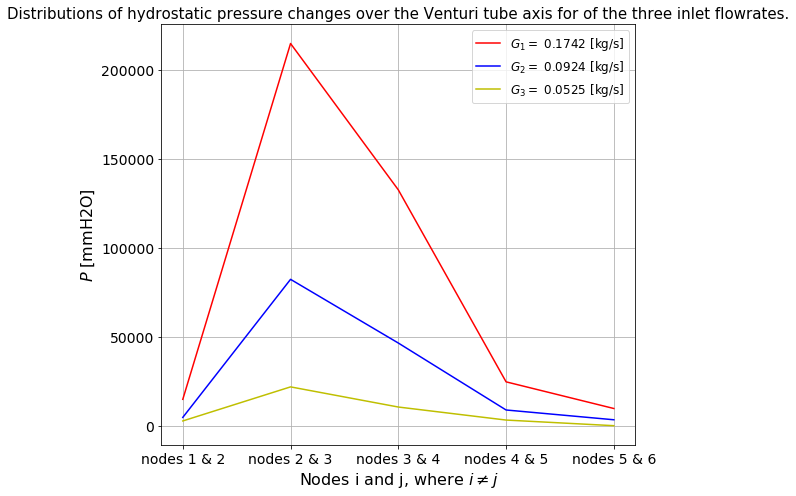

In [482]:
nodes = ["nodes 1 & 2", 
         "nodes 2 & 3", 
         "nodes 3 & 4",
         "nodes 4 & 5",
         "nodes 5 & 6"]
(fig, ax1) = plt.subplots(1, figsize=(10, 7))

ax1.plot(nodes,exp1deltaP,'r-',label='$G_1 =$ '+str(round(G[0], 4)) + ' [kg/s]')
ax1.plot(nodes,exp2deltaP,'b-',label='$G_2 =$ '+str(round(G[1], 4)) + ' [kg/s]')
ax1.plot(nodes,exp3deltaP,'y-',label='$G_3 =$ '+str(round(G[2], 4)) + ' [kg/s]')
ax1.set_xlabel(r'Nodes i and j, where $i \neq j$',fontsize=16)
ax1.set_ylabel(r'$P$ [mmH2O]',fontsize=16,color='black')
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)
ax1.legend(loc='upper right',fontsize=12)
ax1.grid(True)

plt.title('Distributions of hydrostatic pressure changes over the Venturi tube axis for of the three inlet flowrates.', 
          fontsize=15)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
print('')

# Estimate the permanent pressure loss along the Venturi meter. 
$\\\\$
Basu, Swapan Debnath, Ajay Kumar. (2019). Power Plant Instrumentation and Control Handbook - A Guide to Thermal Power Plants (2nd Edition) - 4.4.2.4 Orifice Plate. (pp. 282, 283, 284, 285). Elsevier. Retrieved from 
https://app.knovel.com/hotlink/pdf/id:kt0122PUY8/power-plant-instrumentation/orifice-plate

In [470]:
# 40% from literature values

# Estimate the losses for the same length of pipe if the diameter remains constant (assuming smooth pipe). 

# Identify the type of flow.

# Estimate the profile of the maximum velocity along the Venturi meter. 


# Calculate the maximum and average velocity at different locations and Reynolds numbers from theory.


# Where are the deviations from the theoretical predictions attributed?

# Compare the converging and diverging sections of the Venturi meter in terms of velocity, total head, and energy losses.